##### Import NCC toolbox converted to Python

In [1]:
import numpy as np
from src.eeg_analysis.utils.NCC_converted_toolbox import gendata, pldist, plmle, plparams, plplottool

##### Generate a sample power law distribution

In [9]:
tau = 2.0
lambda_ = 0.1
xmin = 20
xmax = 90

generated_data, xVals, pdf = gendata(100000, ['truncated_powerlaw', [tau, lambda_, xmin, xmax]], 'inf', 2, 'sup', 120 )
print(generated_data)  # Generate 10000 samples from a discrete power-law with exponent 1.5

[  2.   2.   2. ... 120. 120. 120.]


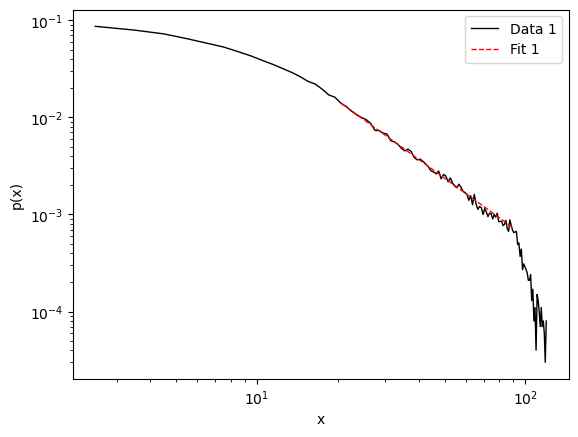

{'x': [(array([  2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,  10.5,
           11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
           20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,
           29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,
           38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,
           47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,  54.5,  55.5,
           56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,  63.5,  64.5,
           65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,  72.5,  73.5,
           74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,  81.5,  82.5,
           83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,  90.5,  91.5,
           92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,  99.5, 100.5,
          101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5, 108.5, 109.5,
          110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5, 117.5, 118.5,
          119.5]),
   array([8.672e-02, 7.927e

In [10]:
# Plot the data using plplottool
fitParams = {
    'tau':[2.0], 
    'color': [[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 0]],
    'linewidth': 1,
    'linestyle': '--',
    'dot': 'off',
    'dotsize': 5,
    'x2fit': [0],
    'xmin': [xmin],
    'xmax': [xmax]}

plplottool(generated_data, 'fitParams', fitParams)

##### Test the pldist fucntion for generating power-law distributed data

In [ ]:
# x_min = 2
# x_max = 100
# slope = 1.5

# # Generate a double truncated power-law distributed data 
# generated_data = pldist(1000, 'slope', slope, 'double', x_min, x_max, 'plot')

##### Estimate the power law slope/exponent) using Maximum Likelihood Estimation (MLE)

In [ ]:
tau, x_min, x_max, L = plmle(generated_data, 'xmin', xmin, 'xmax', xmax) 
print(f'tau: {tau}, x_min: {x_min}, x_max: {x_max}, Likelihood: {L}')

In [ ]:
# Trying to fit a non-truncated power-law distribution to the truncated data
tau, x_min, x_max, L = plmle(generated_data) 
print(f'tau: {tau}, x_min: {x_min}, x_max: {x_max}, Likelihood: {L}')

##### Estimating the parameters of truncated power law distribution fit using plparams  

In [ ]:
num_samples = 200
tau, xmin, xmax, sigma, p, pCrit, ks = plparams(generated_data, 'samples', num_samples)
print(f'tau: {tau}, xmin: {xmin}, xmax: {xmax}, sigmaTau: {sigma}, p-value: {p}, critical p-value: {pCrit}, KS statistic: {ks}')